In [55]:
import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf
import pandas_datareader.data as web
from datetime import date
import seaborn as sns

In [2]:
API_KEY="TSiTjoTArFwQ7LUzKhD2"

In [3]:
url = f"https://www.alphavantage.co/query?function=DIGITAL_CURRENCY_DAILY&symbol=BTC&market=USD&apikey={API_KEY}"

In [4]:
data = requests.get(url).json()

In [5]:
data.keys()

dict_keys(['Meta Data', 'Time Series (Digital Currency Daily)'])

In [6]:
bitcoin = data['Time Series (Digital Currency Daily)']

In [7]:
df = pd.DataFrame().from_dict(bitcoin, orient="index")

In [8]:
df = df.apply(pd.to_numeric)

In [9]:
df["date"]=pd.to_datetime(df.index)

In [10]:
df.keys()

Index(['1a. open (USD)', '1b. open (USD)', '2a. high (USD)', '2b. high (USD)',
       '3a. low (USD)', '3b. low (USD)', '4a. close (USD)', '4b. close (USD)',
       '5. volume', '6. market cap (USD)', 'date'],
      dtype='object')

In [11]:
BTC=df[['4a. close (USD)']]

In [12]:
BTC

,4a. close (USD)
2022-10-04,19612.04
2022-10-03,19629.08
2022-10-02,19056.80
2022-10-01,19310.95
2022-09-30,19422.61
...,...
2020-01-13,8110.34
2020-01-12,8184.98
2020-01-11,8020.01
2020-01-10,8197.02


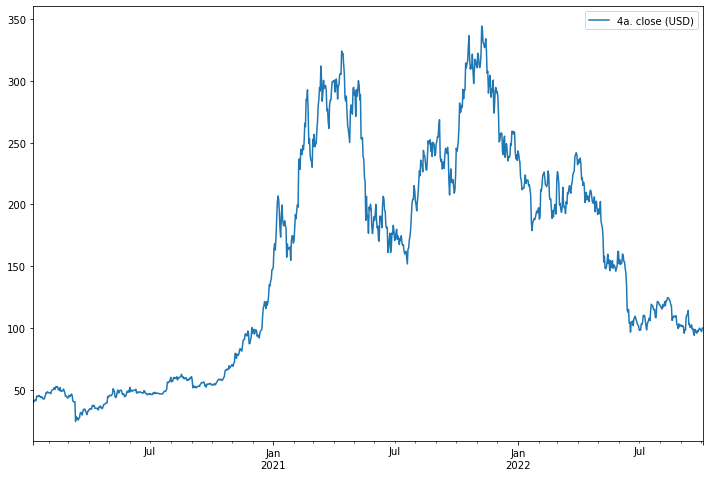

In [48]:
(BTC/BTC.iloc[0] * 100).plot(figsize=(12,8));
plt.savefig("project1.png")

In [14]:
tickers = yf.Tickers('AAPL MSFT GOOG AMZN TSLA')

In [15]:
df2= tickers.history()

[*********************100%***********************]  5 of 5 completed


In [16]:
close = df2["Close"]

In [51]:
close.tail(10)

,AAPL,AMZN,GOOG,MSFT,TSLA
Date,,,,,
2022-09-21,153.720001,118.540001,100.010002,238.949997,300.799988
2022-09-22,152.740005,117.309998,100.570000,240.979996,288.589996
2022-09-23,150.429993,113.779999,99.169998,237.919998,275.329987
2022-09-26,150.770004,115.150002,98.809998,237.449997,276.010010
2022-09-27,151.759995,114.410004,98.089996,236.410004,282.940002
2022-09-28,149.839996,118.010002,100.739998,241.070007,287.809998
2022-09-29,142.479996,114.800003,98.089996,237.500000,268.209991
2022-09-30,138.199997,113.000000,96.150002,232.899994,265.250000
2022-10-03,142.449997,115.879997,99.300003,240.740005,242.399994


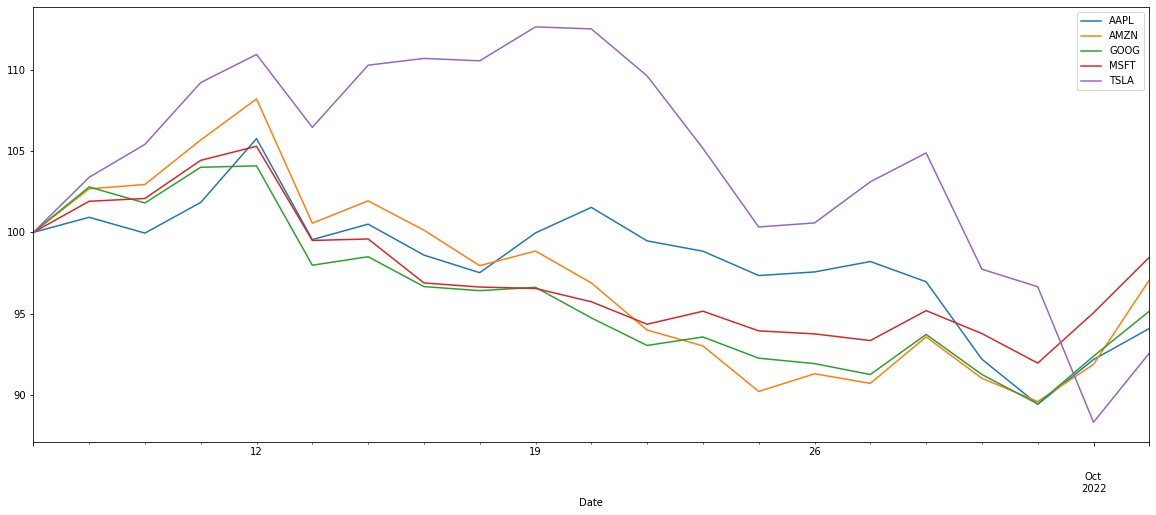

In [49]:
(close/close.iloc[0] * 100).plot(figsize=(20,8));
plt.savefig("project2.png")

In [18]:
returns = np.log(close/close.shift(1))
returns.tail()

,AAPL,AMZN,GOOG,MSFT,TSLA
Date,,,,,
2022-09-28,-0.012732,0.030981,0.026658,0.019520,0.017066
2022-09-29,-0.050366,-0.027578,-0.026658,-0.014920,-0.070530
2022-09-30,-0.030500,-0.015804,-0.019976,-0.019558,-0.011097
2022-10-03,0.030289,0.025167,0.032236,0.033108,-0.090084
2022-10-04,0.020497,0.054903,0.029471,0.035220,0.046941


In [19]:
returns.mean() * 252

AAPL   -0.767336
AMZN   -0.374180
GOOG   -0.626075
MSFT   -0.194537
TSLA   -0.971827
dtype: float64

In [20]:
returns.cov() * 252

,AAPL,AMZN,GOOG,MSFT,TSLA
AAPL,0.166654,0.146723,0.108065,0.104836,0.105344
AMZN,0.146723,0.218746,0.155594,0.145515,0.149169
GOOG,0.108065,0.155594,0.132111,0.119506,0.075853
MSFT,0.104836,0.145515,0.119506,0.116183,0.060735
TSLA,0.105344,0.149169,0.075853,0.060735,0.357120


In [21]:
noa = len(close.columns)
weights = np.random.random(noa)
weights /= np.sum(weights)
weights

array([0.10211274, 0.07582574, 0.15409554, 0.272265  , 0.39570099])

In [22]:
expected_return = np.sum(returns.mean() * weights) * 252
expected_return

-0.640721127440399

In [23]:
expected_variance = np.dot(weights.T, np.dot(returns.cov() * 252, weights))
expected_variance

0.14163809895758134

In [24]:
volatility = np.sqrt(np.dot(weights.T, np.dot(returns.cov() * 252, weights))) 
volatility

0.37634837445853453

In [25]:
start = date(2020, 1, 9)
end = date.today()

In [26]:
portfolio = ["AAPL","MSFT","GOOG","AMZN", "TSLA"]
data = pd.DataFrame()
for co in portfolio:
    data[co] = web.DataReader(co, 'yahoo', start, end)["Close"]

In [29]:
BTC.index = pd.to_datetime(BTC.index)

In [30]:
new_df = data.join(BTC)

In [31]:
new_df=new_df.rename(columns={"4a. close (USD)": "BTC"})

In [40]:
new_df

,AAPL,MSFT,GOOG,AMZN,TSLA,BTC
Date,,,,,,
2020-01-09,77.407501,162.089996,70.991501,95.052498,32.089333,7817.76
2020-01-10,77.582497,161.339996,71.486504,94.157997,31.876667,8197.02
2020-01-13,79.239998,163.279999,71.961502,94.565002,34.990665,8110.34
2020-01-14,78.169998,162.130005,71.543999,93.472000,35.861332,8810.01
2020-01-15,77.834999,163.179993,71.959999,93.100998,34.566666,8821.41
...,...,...,...,...,...,...
2022-09-28,149.839996,241.070007,100.739998,118.010002,287.809998,19412.82
2022-09-29,142.479996,237.500000,98.089996,114.800003,268.209991,19591.51
2022-09-30,138.199997,232.899994,96.150002,113.000000,265.250000,19422.61


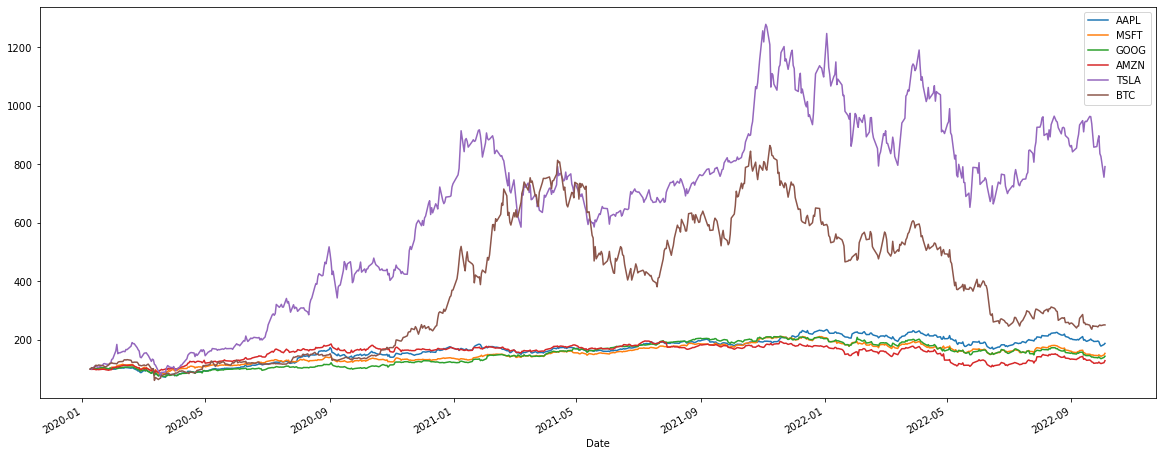

In [50]:
# plt.figure(figsize=(12,8))
(new_df/new_df.iloc[0] * 100).plot(figsize=(20,8));
plt.savefig("project3.png")
# new_df.plot

In [42]:
new_df

,AAPL,MSFT,GOOG,AMZN,TSLA,BTC
Date,,,,,,
2020-01-09,77.407501,162.089996,70.991501,95.052498,32.089333,7817.76
2020-01-10,77.582497,161.339996,71.486504,94.157997,31.876667,8197.02
2020-01-13,79.239998,163.279999,71.961502,94.565002,34.990665,8110.34
2020-01-14,78.169998,162.130005,71.543999,93.472000,35.861332,8810.01
2020-01-15,77.834999,163.179993,71.959999,93.100998,34.566666,8821.41
...,...,...,...,...,...,...
2022-09-28,149.839996,241.070007,100.739998,118.010002,287.809998,19412.82
2022-09-29,142.479996,237.500000,98.089996,114.800003,268.209991,19591.51
2022-09-30,138.199997,232.899994,96.150002,113.000000,265.250000,19422.61


In [43]:
new_returns = np.log(new_df/new_df.shift(1))
new_returns.tail()

,AAPL,MSFT,GOOG,AMZN,TSLA,BTC
Date,,,,,,
2022-09-28,-0.012732,0.019520,0.026658,0.030981,0.017066,0.017339
2022-09-29,-0.050366,-0.014920,-0.026658,-0.027578,-0.070530,0.009163
2022-09-30,-0.030500,-0.019558,-0.019976,-0.015804,-0.011097,-0.008658
2022-10-03,0.030289,0.033108,0.032236,0.025167,-0.090084,0.010574
2022-10-04,0.020497,0.035220,0.029471,0.054780,0.046745,-0.000868


In [44]:
new_returns.mean() * 252

AAPL    0.230569
MSFT    0.157559
GOOG    0.133518
AMZN    0.092500
TSLA    0.756662
BTC     0.336395
dtype: float64

In [45]:
new_returns.cov() * 252

,AAPL,MSFT,GOOG,AMZN,TSLA,BTC
AAPL,0.135061,0.102590,0.089468,0.094059,0.142059,0.097994
MSFT,0.102590,0.118467,0.094826,0.092544,0.130919,0.102187
GOOG,0.089468,0.094826,0.113455,0.087953,0.114895,0.093356
AMZN,0.094059,0.092544,0.087953,0.146595,0.133446,0.097090
TSLA,0.142059,0.130919,0.114895,0.133446,0.524870,0.169398
BTC,0.097994,0.102187,0.093356,0.097090,0.169398,0.597309


In [46]:
new_noa = len(new_df.columns)
new_weights = np.random.random(new_noa)
new_weights /= np.sum(new_weights)
new_weights

array([0.02462966, 0.09250563, 0.30921361, 0.16546835, 0.11120877,
       0.29697398])

In [47]:
new_expected_return = np.sum(new_returns.mean() * new_weights) * 252
new_expected_return

0.2608933086476601

In [56]:
new_df.corr()

,AAPL,MSFT,GOOG,AMZN,TSLA,BTC
AAPL,1.000000,0.924468,0.879313,0.529462,0.946108,0.667428
MSFT,0.924468,1.000000,0.969738,0.590989,0.909404,0.785206
GOOG,0.879313,0.969738,1.000000,0.562972,0.869994,0.833349
AMZN,0.529462,0.590989,0.562972,1.000000,0.525994,0.614756
TSLA,0.946108,0.909404,0.869994,0.525994,1.000000,0.772236
BTC,0.667428,0.785206,0.833349,0.614756,0.772236,1.000000


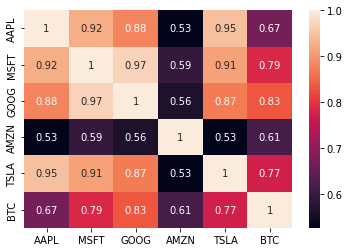

In [62]:
sns.heatmap(new_df.corr(),annot=True)
plt.savefig("project4.png");